# Interpretation of Confidence Interval

In the class, we have seen that a $100(1-\alpha)\%$ confidence interval for $\mu$, when the population is 
$N(\mu, \sigma^2)$ with known $\sigma^2$, is:

$(\bar{X} - z_{1-\alpha/2}*\frac{\sigma}{\sqrt n}, \bar{X} + z_{1-\alpha/2}*\frac{\sigma}{\sqrt n})$.


Now, let's investigate the meaning of confidence interval through a simulation study based on repeatedly building confidence intervals.

In [3]:
#import required libraries
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
from IPython.display import display

Under given settings (true population mean, sigma, sample size, and confidence level), build N  $100(1-\alpha)\%$ confidence intervals for $\mu$.

In [4]:
#build up the confidence intervals
np.random.seed(123) # set a random seed
N = 100    #number of repetitions (repeated sampling)
mu = 10    #true population mean
sigma = 2  #true population standard deviation
n = 10     #sample size 
confidence_level = 0.95  #confidence level
two_tail_prob = (1-confidence_level)/2   
z_value = stats.norm.ppf(q = (1-two_tail_prob))  #zvalue    
margin_of_error = z_value * (sigma/math.sqrt(n))
    
sample_means = []
intervals = []

for i in range(N):
    
    #generate N different samples with size n under these settings
    sample = np.random.normal(loc = mu, scale = sigma, size = n)
    #calculate sample means
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    #calculate 100(1-alpha)% confidence interval
    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)                          
    intervals.append(confidence_interval)


In [5]:
# check which intervals do not cover mu
out_of_interval = []

for i in range(N):
    if (mu < intervals[i][0] or mu > intervals[i][1]):
        ci_interval = True
    else:
        ci_interval = False
    out_of_interval.append(ci_interval)

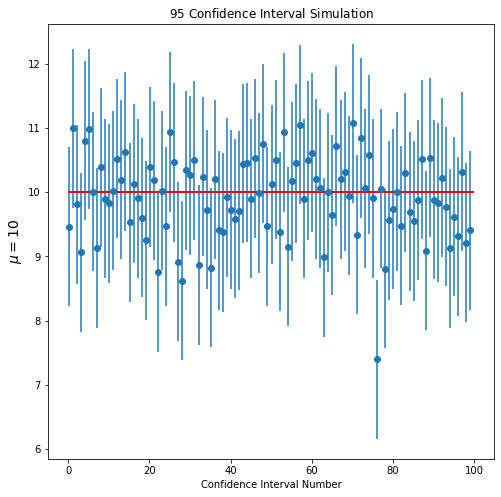

In [6]:
#static version
plt.figure(figsize=(8,8))

plt.errorbar(x=np.arange(0.1, N, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')
plt.ylabel(r'$\mu=%.0f$' % (mu), size = 14)
plt.xlabel(r'Confidence Interval Number')
plt.title(r"$%.0f$ Confidence Interval Simulation" % (confidence_level*100))
#\%  percantage missing

plt.hlines(xmin=0, xmax=100,
           y=10, 
           linewidth=2.0,
           color="red");

In above figure, it is not easy to see the confidence intervals which do not involve $\mu$. For that reason, let's do the same through an interactive plot. 

In [7]:
# prepare the data 
# check which intervald do not invovle mu, if so, color them in red, o.w. in blue

x_data = np.arange(1, (N+1), 1)
y_data = sample_means
err_y_data = np.repeat(margin_of_error, N)

colors = []

for i in range(N):
    if out_of_interval[i] == True:
        color = "red"
    else:
        color = "blue"  
    colors.append(color)

In [9]:
#use plotly 
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=x_data, y=y_data,
                            text=np.round(y_data, 1),
                            mode='markers',
                            #textposition='top center',
                            marker=dict(color=colors, size=6),
                            showlegend=False
            ))

for i, bar in enumerate(err_y_data):
    fig.add_trace(go.Scatter(
                    x=[x_data[i]],
                    y=[y_data[i]],
                   # text=np.round(y_data, 1),
                    mode='markers',
                    #textposition='top center',
                    error_y=dict(
                        type='data',
                        color = colors[i],
                        array=[bar],
                        visible=True),
                    marker=dict(color='rgba(0,0,0,0)', size=12),
                    showlegend=False
                ))

fig.update_layout(
    title=r"95% Confidence Interval Simulation",
    xaxis_title="Confidence Interval Number",
    yaxis_title=r'$\mu=%.0f$' % (mu)
)

    
fig.add_hline(y=mu)

fig.show(renderer="colab")

In this repeated sampling example, now we can see that among 100 confidence intervals, 97 of them involves the true value of the population mean (if you increase the number of repetitions, it will be close to 95).